In [ ]:
# mount to the Google Drive folder -> edits made to change file upload paths from google drive to local drive
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# access the bike_utilization data csv 
path = 'C:\Users\giuli\Documents\Jupiter Notebks\P2\Bike_Census_Utilization.csv'
bike_utilization = pd.read_csv(path)

In [ ]:
bike_utilization.head()

,Neighbourhood,BikeShare Rides,Census Rides,Rider Utilization
0,Annex,88425,1675,0.020226
1,Bathurst Manor,263,15,0.006718
2,Bay Street Corridor,509735,325,0.600925
3,Birchcliffe-Cliffside,92,140,0.000252
4,Blake-Jones,1219,305,0.001531


In [ ]:
bike_utilization = bike_utilization.sort_values(by='Rider Utilization')
bike_utilization

,Neighbourhood,BikeShare Rides,Census Rides,Rider Utilization
75,lee,263,0,0.000000
73,danforth,390,0,0.000000
66,Weston-Pellam Park,178,0,0.000000
7,Cabbagetown-South St.James Town,47339,0,0.000000
42,North St.James Town,72738,0,0.000000
...,...,...,...,...
27,Kensington-Chinatown,198707,940,0.080993
61,University,129192,555,0.089187
62,Waterfront Communities-The Island,537848,1570,0.131256
9,Church-Yonge Corridor,238422,690,0.132390


In [ ]:
bike_utilization.shape

(76, 4)

In [ ]:
# the neighbourhood 'danforth' is not capitalised, so it is corrected for merging later
bike_utilization = bike_utilization.replace({'Neighbourhood': {'danforth': 'Danforth'}})

In [ ]:
path_2 = 'C:\Users\giuli\Documents\Jupiter Notebks\P2\station_neighbourhoods-capacity.csv'
stations = pd.read_csv(path_2)

In [ ]:
stations.head()

,Unnamed: 0,Station Id,Station Name,Neighbourhood,capacity
0,0,7000,Fort York Blvd / Capreol Ct,Waterfront Communities-The Island,35
1,1,7001,Wellesley Station Green P,Church-Yonge Corridor,17
2,2,7002,St. George St / Bloor St W,University,19
3,3,7003,Madison Ave / Bloor St W,Annex,15
4,4,7004,University Ave / Elm St,Kensington-Chinatown,11


In [ ]:
path_3 = 'C:\Users\giuli\Documents\Jupiter Notebks\P2\station_neighbhourhoods_concat.csv'
station_neighbhourhoods = pd.read_csv(path_3)

In [ ]:
# find total number of bike spots per neighbourhood
count_by_neighbhourhood = pd.DataFrame({'Total bike spots': stations.groupby(['Neighbourhood'])['capacity'].agg('sum')}).reset_index(drop=False)

# there is a space in front of each neighbourhood, so 'strip()' is used for cleaning
count_by_neighbhourhood['Neighbourhood'] = count_by_neighbhourhood['Neighbourhood'].str.strip()
count_by_neighbhourhood.head()

,Neighbourhood,Total bike spots
0,Annex,333
1,Bathurst Manor,50
2,Bay Street Corridor,967
3,Birchcliffe-Cliffside,22
4,Blake-Jones,15


In [ ]:
# load clean census DataFrame
path_4 = 'C:\Users\giuli\Documents\Jupiter Notebks\P2\clean_census.csv'
clean_census = pd.read_csv(path_4)
clean_census=clean_census.rename(columns = {'Unnamed: 0':'Neighbourhood'})

In [ ]:
clean_census.head()

,Neighbourhood,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),0 to 04 years,05 to 09 years,10 to 14 years,...,85 to 89 years,90 to 94 years,95 to 99 years,Bicycle,Census families in private households by family size,2 persons,3 persons,4 persons,5 or more persons,Couples without children
0,Agincourt North,"3,840","3,705","11,305","4,230","6,045",925,1280.0,1315.0,1255.0,...,560.0,260.0,85.0,70,8430,3570,2390,1875,605,2520
1,Agincourt South-Malvern West,"3,075","3,360","9,965","3,265","4,105",555,1105.0,1035.0,935.0,...,360.0,145.0,40.0,35,6650,2970,1835,1325,520,2095
2,Alderwood,"1,760","1,235","5,220","1,825","2,015",320,680.0,595.0,480.0,...,195.0,105.0,15.0,65,3480,1605,900,755,220,1175
3,Annex,"2,360","3,750","15,040","3,480","5,910","1,040",925.0,765.0,680.0,...,575.0,340.0,115.0,"1,675",6710,4475,1195,805,215,3830
4,Banbury-Don Mills,"3,605","2,730","10,810","3,555","6,975","1,640",1070.0,1260.0,1275.0,...,955.0,535.0,125.0,65,7600,3925,1760,1500,435,3015


In [ ]:
# merge rider utilisation and total bike spots for each neighbourhood
station_count_with_utilisation = bike_utilization.merge(count_by_neighbhourhood, how='left', 
                                                        left_on='Neighbourhood', right_on='Neighbourhood')

station_count_with_utilisation = station_count_with_utilisation.sort_values('Total bike spots', ascending=False)
station_count_with_utilisation = station_count_with_utilisation.dropna(subset=['Total bike spots'])
station_count_with_utilisation.head()

,Neighbourhood,BikeShare Rides,Census Rides,Rider Utilization,Total bike spots
73,Waterfront Communities-The Island,537848,1570,0.131256,1350.0
75,Bay Street Corridor,509735,325,0.600925,967.0
74,Church-Yonge Corridor,238422,690,0.132390,663.0
68,Niagara,179684,1330,0.051763,652.0
71,Kensington-Chinatown,198707,940,0.080993,483.0


In [ ]:
# merge station count with utilisation with clean census data. Get full data for linear regression
full_data = station_count_with_utilisation.merge(clean_census, how='left',
                                                 left_on='Neighbourhood', right_on='Neighbourhood')
# remove unnecessary space in column names
full_data.columns = full_data.columns.str.strip()
# full_data = full_data.drop(['BikeShare Rides', 'Census Rides'], axis=1)

# no census information for 4 neighbourhoods: Mimico, North St. James Town, Cabbagetown-Sotuh St. James Town, Weston-Pellam Park
# drop rows for those 4 neighbourhoods. No info on bicycle population
full_data = full_data.dropna(subset=['Bicycle']) 

# remove useless column
full_data = full_data.drop(['Census families in private households by family size'], axis=1)

# need to remove ',' from '1,500' to convert number
full_data['Bicycle']=full_data['Bicycle'].apply(lambda x: x.replace(',','')) 
full_data['Children (0-14 years)']=full_data['Children (0-14 years)'].apply(lambda x: x.replace(',','')) 
full_data['Youth (15-24 years)']=full_data['Youth (15-24 years)'].apply(lambda x: x.replace(',','')) 
full_data['Working Age (25-54 years)']=full_data['Working Age (25-54 years)'].apply(lambda x: x.replace(',','')) 
full_data['Pre-retirement (55-64 years)']=full_data['Pre-retirement (55-64 years)'].apply(lambda x: x.replace(',','')) 
full_data['Seniors (65+ years)']=full_data['Seniors (65+ years)'].apply(lambda x: x.replace(',','')) 
full_data['Older Seniors (85+ years)']=full_data['Older Seniors (85+ years)'].apply(lambda x: x.replace(',','')) 

# convert data columns from str to numbers
full_data = full_data.apply(lambda x: pd.to_numeric(x,errors='ignore'))

full_data.head()

,Neighbourhood,BikeShare Rides,Census Rides,Rider Utilization,Total bike spots,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),...,80 to 84 years,85 to 89 years,90 to 94 years,95 to 99 years,Bicycle,2 persons,3 persons,4 persons,5 or more persons,Couples without children
0,Waterfront Communities-The Island,537848,1570,0.131256,1350.0,3650,7840,45105,4680,4635,...,540.0,255.0,105.0,25.0,1570,11035,2275,845,245,9825
1,Bay Street Corridor,509735,325,0.600925,967.0,1695,6860,13065,1760,2420,...,320.0,215.0,85.0,5.0,325,3550,965,485,105,2950
2,Church-Yonge Corridor,238422,690,0.132390,663.0,1260,5060,18780,3235,3010,...,370.0,185.0,50.0,10.0,690,4680,850,280,90,4130
3,Niagara,179684,1330,0.051763,652.0,2055,2415,23320,1885,1510,...,130.0,70.0,20.0,0.0,1330,5430,1160,450,85,4765
4,Kensington-Chinatown,198707,940,0.080993,483.0,1315,3350,8760,1795,2705,...,515.0,295.0,145.0,15.0,940,2070,735,395,175,1540


(0.0, 0.7)

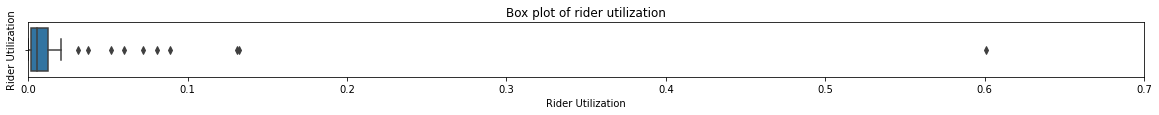

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize=(20,1))
fig = sns.boxplot(x='Rider Utilization', data=full_data)
fig.set_title('Box plot of rider utilization')
fig.set_ylabel('Rider Utilization')
plt.xlim(0, 0.7)

Text(0.5, 1.0, 'Violinplot of rider utilization for each neighbourhood')

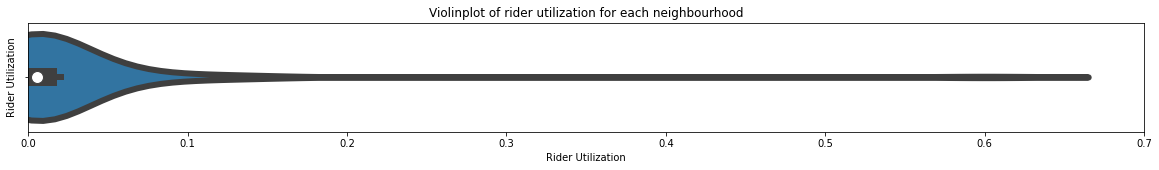

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,2))
sns.violinplot(x='Rider Utilization',data=full_data,linewidth=6)
plt.xlim(0, 0.7)
plt.ylabel('Rider Utilization')
plt.title('Violinplot of rider utilization for each neighbourhood')

In [ ]:
# screen neighbourhoods with rider utilization between 25% and 75% quantiles
Q1 = full_data['Rider Utilization'].quantile(0.25)
median = full_data['Rider Utilization'].quantile(0.5)
Q3 = full_data['Rider Utilization'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1
upper_threshold = Q3

full_data_good = full_data[(full_data['Rider Utilization']>=lower_threshold) & 
                          (full_data['Rider Utilization']<=upper_threshold)]
full_data_bad = full_data[full_data['Rider Utilization']<lower_threshold]
full_data_excess = full_data[(full_data['Rider Utilization']>upper_threshold) & 
                          (full_data['Rider Utilization']<=(Q3+1.5*IQR))]

In [ ]:
print(Q1)
print(Q3)

0.001931092534540725
0.0123294014195088


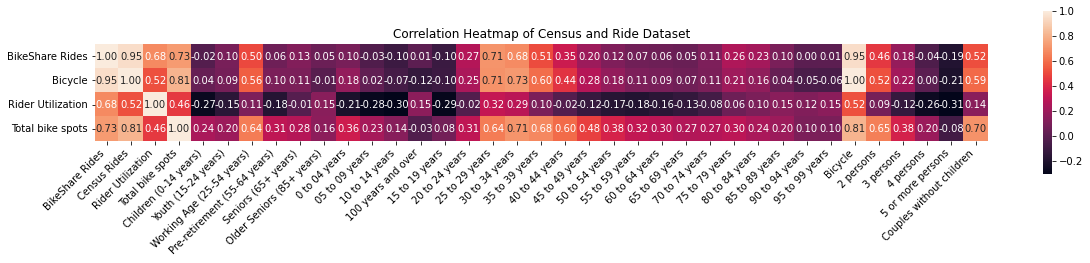

In [ ]:
# create heat map to choose modelling variables
correlation = full_data_good.corr()
# correlation = correlation[['BikeShare Rides','Census Rides','Rider Utilization','Total bike spots']]
correlation = correlation[['BikeShare Rides','Bicycle','Rider Utilization','Total bike spots']]

correlation = correlation.transpose()

plt.figure(figsize=(20,3))
plt.title('Correlation Heatmap of Census and Ride Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

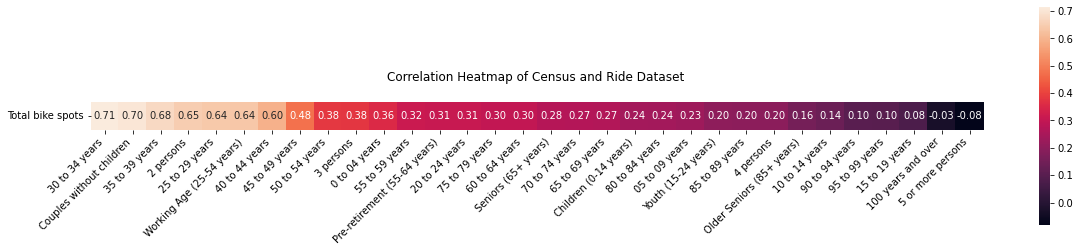

In [ ]:
# sorted heat map for only total bike spots

sorted_correlation_series = correlation.sort_values(by='Total bike spots', axis=1, ascending=False).loc['Total bike spots']
sorted_correlation = pd.DataFrame({'Total bike spots': sorted_correlation_series}).transpose()
drop_lst = ['BikeShare Rides','Census Rides','Rider Utilization','Total bike spots', 'Bicycle']
sorted_correlation = sorted_correlation.drop(columns=drop_lst,axis=1)

plt.figure(figsize=(20,4))
plt.title('Correlation Heatmap of Census and Ride Dataset \n')
ax = sns.heatmap(sorted_correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
plt.show()

In [ ]:
correlation_threshold = 0.29
sorted_correlation = sorted_correlation.transpose()
features = sorted_correlation[sorted_correlation['Total bike spots'] > correlation_threshold].index.to_list()
print(features)

['30 to 34 years', 'Couples without children', '35 to 39 years', '2 persons', '25 to 29 years', 'Working Age (25-54 years)', '40 to 44 years', '45 to 49 years', '50 to 54 years', '3 persons', '0 to 04 years', '55 to 59 years', 'Pre-retirement (55-64 years)', '20 to 24 years', '75 to 79 years', '60 to 64 years']


RMSE Score: (Might not need this because the sample size is very small, so we need to use cross validation.

In [ ]:
# split training, and test datasets
from sklearn.model_selection import train_test_split

train, val_and_test = train_test_split(full_data_good, train_size = 0.7, test_size = 0.3, random_state = 0)
val, test = train_test_split(val_and_test, train_size = 0.5, test_size = 0.5, random_state = 0)

# Print results
print('Train {}%'.format(train.shape[0] / full_data_good.shape[0] * 100))
print('Val {}%'.format(val.shape[0] / full_data_good.shape[0] * 100))
print('Test {}%'.format(test.shape[0] / full_data_good.shape[0] * 100))

Train 67.64705882352942%
Val 14.705882352941178%
Test 17.647058823529413%


In [ ]:
import numpy as np

# function to process data
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data(data):
    """Process the data for a guided model."""

    # Select Features
    data = select_columns(data, 
                          'Total bike spots',
                          '30 to 34 years', 
                          'Couples without children', 
                          '35 to 39 years')
    
    # Return predictors and response variables separately
    X = data.drop(['Total bike spots'], axis = 1)
    y = data.loc[:, 'Total bike spots']
    
    return X, y

In [ ]:
# generate X and y variables for train and val data set
X_train, y_train = process_data(train)
X_val, y_val = process_data(val)

In [ ]:
# function to compute rmse
def rmse(actual, predicted):
    return (np.sum((actual-predicted)**2) / len(actual))**(1/2)

In [ ]:
# Write your code here.

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True)

linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [ ]:
print(y_val.to_list())
print(y_predicted.round(1))

[86.0, 122.0, 83.0, 112.0, 30.0]
[ 56.  106.2  93.3  67.6  68. ]


In [ ]:
# Evaluate rmse scores
training_error = rmse(y_train, y_fitted)
val_error = rmse(y_val, y_predicted)

# Print rmse scores
print('Training RMSE: {}'.format(training_error))
print('Validation RMSE: {}'.format(val_error))

Training RMSE: 50.95098072736856
Validation RMSE: 30.560378862167706


Cross validation score: (Use this part to determine the number of features to select)

- Especially when datasets are small, sampling bias can cause differences in performance depending on how a dataset is split. 

- Cross-validation ensures you're able to monitor this variability and evaluate your models properly.

In [ ]:
# set up training data
train, test = train_test_split(full_data_good, test_size=0.30, random_state=0)

print('Train {}%'.format(train.shape[0] / full_data_good.shape[0] * 100))
print('Test {}%'.format(test.shape[0] / full_data_good.shape[0] * 100))

X_train, y_train = process_data(train)

Train 67.64705882352942%
Test 32.35294117647059%


In [ ]:
# function to compute cross_validate_rmse
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model, X, y):
    
    # Setup
    model = clone(model)
    three_fold = KFold(n_splits=4)
    rmse_values = []
    
    # Iterature thought cv-folds
    for train_index, val_index in three_fold.split(X):
            
        # Fit model
        model.fit(X.iloc[train_index],y.iloc[train_index])
        
        # Append RMSE scores
        rmse_values.append(rmse(y.iloc[val_index], model.predict(X.iloc[val_index])))
        
    return rmse_values

In [ ]:
# Evaluate cross validation scores
cv_scores = cross_validate_rmse(model=LinearRegression(fit_intercept=True), X=X_train, y=y_train)

# Print cross validation scores
print('Cross-validation RMSE scores: {}'.format(cv_scores))
print('Cross-validation RMSE scores mean: {}'.format(np.mean(cv_scores)))
print('Cross-validation RMSE scores std: {}'.format(np.std(cv_scores)))


Cross-validation RMSE scores: [38.69316868528823, 78.30998069023268, 43.347761926221736, 72.31454133595507]
Cross-validation RMSE scores mean: 58.166363159424435
Cross-validation RMSE scores std: 17.354628478294693


Using Q1 to Q3 (Delete)
- With 6 features, RMSE mean = 66.9
- With 5 features, RMSE mean = 66.6
- With 3 features, RMSE mean = 77.5
- With 2 features, RMSE mean = 68.8

Using Q2 to Q3
- With 14 features, RMSE mean = 99.5
- With 9 features, RMSE mean = 162.2
- With 5 features, RMSE mean = 101.3
- With 3 features, RMSE mean = 51.6 

Using Q1 to Q3
- With 16 features, RMSE = 267.87, s.d. = 75.95
- With 13 features, RMSE = 90.41, s.d. = 26.72
- With 10 features, RMSE = 82.35, s.d. = 25.41
- With 7 features, RMSE = 70.26, s.d. = 7.15
- With 5 features, RMSE = 59.37, s.d. = 24.23
- With 4 features, RMSE = 58.55, s.d. = 16.57
- With 3 features, RMSE = 58.17, s.d. = 17.35 (CHOSEN MODEL) 
- With 2 features, RMSE = 51.77, s.d. = 28.9



Now satisfied with the chosen model, so create final model.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True)

# Fit the model
linear_model.fit(X_train, y_train)

# Compute the fitted and predicted values of SalePrice
y_fitted = linear_model.predict(X_train)

training_error = rmse(y_fitted, y_train)
print("Training RMSE: {}".format(training_error))

Training RMSE: 50.95098072736856


In [ ]:
# Pre-process the training data
X_test, y_test = process_data(test)
X_test.head()

y_predicted = linear_model.predict(X_test)
test_error = rmse(y_test, y_predicted)
print("Test RMSE: {}".format(test_error))

Test RMSE: 60.66251928903665


Compute desired number of bikes needed for the bad stations.

In [ ]:
full_data_bad = full_data_bad.reset_index(drop=True)
full_data_bad.head()

,Neighbourhood,BikeShare Rides,Census Rides,Rider Utilization,Total bike spots,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),...,90 to 94 years,95 to 99 years,Bicycle,2 persons,3 persons,4 persons,5 or more persons,Couples without children,Bike spots needed,Bike spots addition
0,Westminster-Branson,246,60,0.001571,38.0,3440,3355,10865,3500,5130,...,330.0,95.0,60,3520,1980,1330,470,2415,142.180667,104
1,Rockcliffe-Smythe,254,85,0.001145,19.0,3505,2740,9255,3090,3655,...,155.0,35.0,85,2840,1515,1160,495,1795,108.985687,89
2,Birchcliffe-Cliffside,92,140,0.000252,22.0,3345,2440,9075,3520,3910,...,195.0,65.0,140,2940,1430,1330,365,2080,107.034229,85
3,Stonegate-Queensway,538,235,0.000877,42.0,4060,2495,10660,3660,4165,...,275.0,45.0,235,3305,1730,1675,395,2530,118.207090,76
4,Humewood-Cedarvale,740,280,0.001013,36.0,2165,1610,7005,1650,1940,...,90.0,30.0,280,1805,780,780,240,1390,111.427811,75


In [ ]:
X_bad, y_bad = process_data(full_data_bad)

full_data_bad['Bike spots needed'] = linear_model.predict(X_bad)

In [ ]:
full_data_bad['Bike spots addition'] = (full_data_bad['Bike spots needed']-full_data_bad['Total bike spots']).astype(int)
full_data_bad['Bike spots addition'] = full_data_bad['Bike spots addition'].apply(lambda x: x if x>0 else 0)

full_data_bad['Bike spots % change'] = ((full_data_bad['Bike spots needed']-full_data_bad['Total bike spots'])/full_data_bad['Total bike spots']*100).astype(int)
full_data_bad['Bike spots % change'] = full_data_bad['Bike spots % change'].apply(lambda x: x if x>0 else 0)

full_data_bad = full_data_bad.sort_values('Bike spots addition',ascending=False)

recommendations = full_data_bad[['Neighbourhood', 'Bike spots addition',  'Bike spots % change']].reset_index(drop=True)
recommendations

,Neighbourhood,Bike spots addition,Bike spots % change
0,Westminster-Branson,104,274
1,Rockcliffe-Smythe,89,473
2,Birchcliffe-Cliffside,85,386
3,Stonegate-Queensway,76,181
4,Humewood-Cedarvale,75,209
5,Weston,64,239
6,West Hill,62,114
7,Oakwood Village,59,109
8,Highland Creek,57,358
9,York University Heights,43,40


In [ ]:
# Save csv of final recommendations for how many more bike spots to add in the neighbhourhood
#recommendations.to_csv('/content/drive/MyDrive/CIV1498_Project_2/Data/recommendations_bad.csv')

Compute excess number of bikes for the over stations.

In [ ]:
full_data_excess.head()

,Neighbourhood,BikeShare Rides,Census Rides,Rider Utilization,Total bike spots,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),...,90 to 94 years,95 to 99 years,Bicycle,2 persons,3 persons,4 persons,5 or more persons,Couples without children,Bike spots needed,Bike spots addition
5,South Riverdale,62104,1145,0.020781,422.0,3975,2445,15025,3120,3330,...,125.0,70.0,1145,3870,1710,1300,365,3020,194.425297,-227
7,South Parkdale,55448,1145,0.018554,356.0,2115,2275,12440,2475,2540,...,80.0,40.0,1145,2715,970,610,210,1955,200.715214,-155
15,Yonge-Eglinton,6451,145,0.017046,207.0,1800,1225,5860,1325,1600,...,55.0,5.0,145,1555,680,665,170,1290,100.673851,-106
29,North Riverdale,25620,615,0.015961,121.0,1960,1170,5490,1645,1660,...,40.0,5.0,615,1480,695,770,190,1170,65.404456,-55
47,Playter Estates-Danforth,12644,255,0.018998,65.0,1150,735,3725,970,1220,...,55.0,10.0,255,970,400,435,130,800,49.241034,-15


In [ ]:
X_excess, y_excess = process_data(full_data_excess)

full_data_excess['Bike spots needed'] = linear_model.predict(X_excess)

full_data_excess['Bike spots addition'] = (full_data_excess['Bike spots needed']-full_data_excess['Total bike spots']).astype(int)
full_data_excess['Bike spots addition'] = full_data_excess['Bike spots addition'].apply(lambda x: x if x<0 else 0)

full_data_excess['Bike spots % change'] = ((full_data_excess['Bike spots needed']-full_data_excess['Total bike spots'])/full_data_excess['Total bike spots']*100).astype(int)
full_data_excess['Bike spots % change'] = full_data_excess['Bike spots % change'].apply(lambda x: x if x<0 else 0)

full_data_excess = full_data_excess.sort_values('Bike spots addition',ascending=True)

recommendations_excess = full_data_excess[['Neighbourhood', 'Bike spots addition', 'Bike spots % change']].reset_index(drop=True)
recommendations_excess

,Neighbourhood,Bike spots addition,Bike spots % change
0,South Riverdale,-227,-53
1,South Parkdale,-155,-43
2,Yonge-Eglinton,-106,-51
3,North Riverdale,-55,-45
4,Playter Estates-Danforth,-15,-24
5,Annex,-9,-2
6,Palmerston-Little Italy,0,0
7,Mount Pleasant West,0,0


In [ ]:
recommendations = pd.concat([recommendations, recommendations_excess])
recommendations

,Neighbourhood,Bike spots addition,Bike spots % change
0,Westminster-Branson,104,274
1,Rockcliffe-Smythe,89,473
2,Birchcliffe-Cliffside,85,386
3,Stonegate-Queensway,76,181
4,Humewood-Cedarvale,75,209
5,Weston,64,239
6,West Hill,62,114
7,Oakwood Village,59,109
8,Highland Creek,57,358
9,York University Heights,43,40


Of the 17 bad stations, only 13 needed more bikes.

Of the 17 excess stations, only 15 needed less bikes. 

In [ ]:
# Save csv of final recommendations for how many more bike spots to add in the neighbhourhood
#recommendations.to_csv('/content/drive/MyDrive/CIV1498_Project_2/Data/recommendations.csv')

In [ ]:
#%%shell
#jupyter nbconvert --to html /content/drive/MyDrive/CIV1498_Project_2/CIV1498_Colab/ML_bike.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/CIV1498_Project_2/CIV1498_Colab/ML_bike.ipynb to html
[NbConvertApp] Writing 624073 bytes to /content/drive/MyDrive/CIV1498_Project_2/CIV1498_Colab/ML_bike.html
